<a href="https://colab.research.google.com/github/WMinerva292/WMinerva292/blob/main/AIModule3Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 3: Introduction to NN Frameworks - Assignment**

###**Problem Statement:**

This assignment challenges students to construct and train a neural network to
accurately classify handwritten digits from the MNIST dataset. The goal is to
navigate through the preprocessing of image data, select an appropriate neural
network architecture, and apply optimization techniques to achieve high
classification accuracy.

###**Introduction:**

The MNIST dataset is a large database of handwritten digits commonly used for
training various image processing systems. The dataset contains 60,000 training
images and 10,000 testing images, each of which is a 28x28 pixel grayscale
image. The goal is to build a neural network model that can accurately classify
these images into one of the ten digit classes (0 through 9).

###**Objectives:**

**Data Preprocessing:**

Prepare the MNIST dataset for training and testing the neural network model. This includes normalization of image pixel values and converting the output labels to a one-hot encoded format.

**Model Development:**

Create a neural network model capable of classifying 28x28 pixel grayscale images of handwritten digits. The model should have an input layer, one or more hidden layers, and an output layer.

**Training:**

Train the neural network model using the preprocessed training data.
Utilize categorical cross-entropy as the loss function, stochastic gradient descent as the optimizer, and track accuracy as a performance metric.
Evaluation: Evaluate the performance of the trained model using the testing
dataset, ensuring that the model generalizes well to unseen data.

**Prediction:**

Implement functionality to make predictions on single images or batches of images, returning the digit class with the highest probability.

**Analysis:**

Analyze the results, understand the model's performance, and explore
ways to improve it if necessary.

### **Challenges and Considerations:**

**Class Imbalance:**

Ensure that the dataset does not have a significant class imbalance that could negatively affect the model’s performance. If imbalance is
present, strategies to mitigate its effects should be considered.

**Model Complexity:**

Choose an appropriate model complexity that is capable of learning from the data without overfitting. This may involve experimenting with different numbers of layers and units, as well as regularization techniques.

**Activation Functions:**

Use appropriate activation functions in the hidden layers (ReLU is commonly used for image data) and softmax activation in the output layer to convert logits to probabilities.

**Evaluation Metrics:**

Focus on accuracy as the primary evaluation metric, but also be open to exploring other metrics that could provide additional insights into the model’s performance.

**Hyperparameter Tuning:**

Experiment with different hyperparameters such as learning rate, batch size, and number of epochs to optimize the model’s performance.

**Predictions and Interpretability:**

Provide clear and interpretable predictions, ensuring that the output probabilities are well-calibrated and meaningful.

In [1]:
# Importing required Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
# Data Preprocessing
# Normalize pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7068 - loss: 8.4814 - val_accuracy: 0.8561 - val_loss: 0.5381
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 4ms/step - accuracy: 0.8319 - loss: 0.6200 - val_accuracy: 0.9096 - val_loss: 0.4336
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8697 - loss: 0.4898 - val_accuracy: 0.9238 - val_loss: 0.3211
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8845 - loss: 0.4334 - val_accuracy: 0.9248 - val_loss: 0.3025
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8963 - loss: 0.3959 - val_accuracy: 0.9378 - val_loss: 0.2828
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9042 - loss: 0.3681 - val_accuracy: 0.9430 - val_loss: 0.2513
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9090 - loss: 0.3529 - val_accuracy: 0.9389 - val_loss: 0.2802
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9140 - loss: 0.339

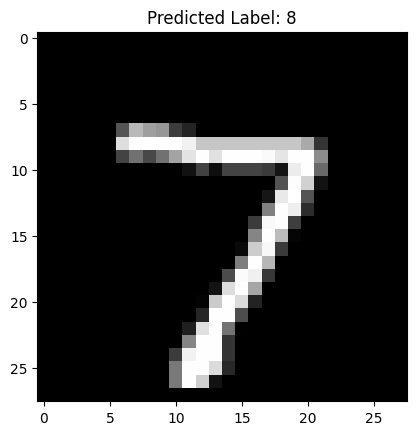

In [7]:
# Defining the Neural Network Model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'), # Using ReLU activation
    layers.Dropout(0.2), # Prevents overfitting
    layers.Dense(10, activation='softmax') # Using Softmax activation for output layer
])

# Compiling the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training the Model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluating the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Making Predictions
def predict_digit(image):
    image = image / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Expand dimensions
    prediction = model.predict(image)
    return np.argmax(prediction)

# Display a sample prediction
sample_image = x_test[0]
predicted_label = predict_digit(sample_image)
plt.imshow(sample_image, cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.show()
